In [ ]:
#@title Importação das bibliotecas, salvamento dos dados coletados e construção do Dataframe.
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest, probplot

with open("LAT.txt", "r", encoding="utf-8-sig") as datas:  # Use "utf-8-sig" para remover o BOM
    data_list = list(map(float, datas.read().split()))

df = pd.DataFrame(data_list, columns=["Latência Média (em milisegundos)"])
df

,Latência Média (em milisegundos)
0,7.4346
1,1.4824
2,11.0120
3,8.3131
4,7.6573
...,...
495,12.7839
496,7.4854
497,13.3688
498,9.0707


In [ ]:
#@title Medidas de dispersão, variabilidade e centralidade
data_median = [statistics.median(data_list)]
data_mean = [statistics.mean(data_list)]
data_variance = [statistics.variance(data_list)]
data_stdev = [statistics.stdev(data_list)]
data_coev = [data_stdev[0]/data_mean[0]]
data_mode = [statistics.mode(data_list)]
dt = pd.DataFrame(list(zip(data_mean, data_median, data_mode, data_variance, data_stdev, data_coev)), columns=["Media","Mediana", "Moda", "Variância", "Desvio padrão", "Coef. Variação"])
dt

,Media,Mediana,Moda,Variância,Desvio padrão,Coef. Variação
0,9.342814,8.94055,7.4346,26.826752,5.179455,0.554378


#Boxplot da amostra

In [ ]:
import plotly.express as px

# boxplot
fig = px.box(data_frame=data_list, y=[0], width=300, height=500)
fig.update_layout(
    title='Boxplot dos Dados Coletados (em ms)',
    xaxis_title='Variáveis',
    yaxis_title='Latência (ms)'
)
fig.show()

# Detectando outliers
outlier_max = []
outlier_min = []
for i in range(len(data_list)):
    if data_list[i] > 23.4355:
        outlier_max.append(data_list[i])
    if data_list[i] < 0.0287:
        outlier_min.append(data_list[i])

print(f'\nOutliers superiores (em ms): {" ".join(map(str, outlier_max))}\n\nOutliers inferiores (em ms): {" ".join(map(str, outlier_min))}')



Outliers superiores (em ms): 26.9835 24.7218 25.3327

Outliers inferiores (em ms): 


# Testes para comprovar uma distribuição normal

In [ ]:
#@title Teste de Anderson Darling
stats.anderson(data_list)

AndersonResult(statistic=2.1392146539660644, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.3428144, scale=5.179454788570544)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
#@title Teste de normalidade pelo P-valor
print('Afim de comprovar que os dados correspondem a uma distribuição normal faremos um teste de hipótese levando em conta o p-valor que será calculado.\n')

print('Demonstração da distribuição normal por p-valor:\nHo = é Normal\nHa = não é normal\nα = 0.05\nDessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).\n')
k, p = stats.normaltest(data_list)

print('Para o cálculo do p-valor faremos o uso da função normaltest que retornará o resultado.')
print(f'Conclusão: Verifica-se o p-valor = {p:.4f}. Logo, o p-valor é menor que α, e dessa forma, aceitamos a hipótese alternativa e concluimos que a distribuição não é normal(refutando o teste de Anderson Darling).')

Afim de comprovar que os dados correspondem a uma distribuição normal faremos um teste de hipótese levando em conta o p-valor que será calculado.

Demonstração da distribuição normal por p-valor:
Ho = é Normal
Ha = não é normal
α = 0.05
Dessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).

Para o cálculo do p-valor faremos o uso da função normaltest que retornará o resultado.
Conclusão: Verifica-se o p-valor = 0.0001. Logo, o p-valor é menor que α, e dessa forma, aceitamos a hipótese alternativa e concluimos que a distribuição não é normal(refutando o teste de Anderson Darling).


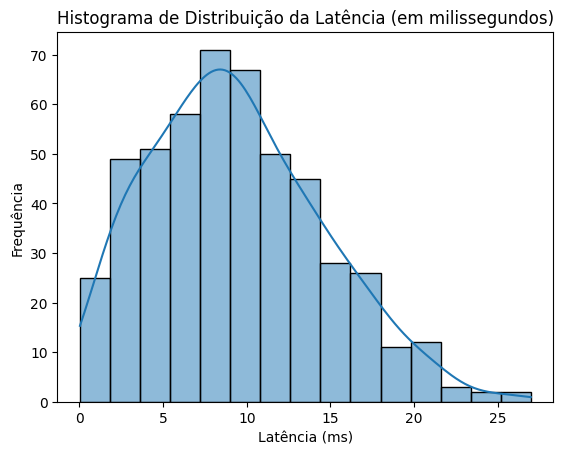

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Título do histograma
plt.title("Histograma de Distribuição da Latência (em milissegundos)")

# Rótulo do eixo X
plt.xlabel("Latência (ms)")

# Rótulo do eixo Y (caso necessário)
plt.ylabel("Frequência")

# Plota o histograma
sns.histplot(data_list, kde=True)
plt.show()

print('Verificando o comportamento do gráfico é possível ver que a curva possui um formato de sino, ainda que não se estenda até a base do eixo y na parte esquerda do gráfico.')
print('Dessa forma, conclui-se que a distribuição é normal.')

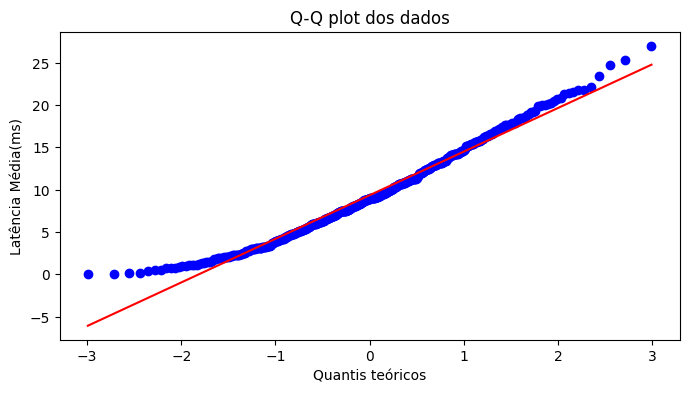

In [ ]:
def qq_plot(data):
    """
    Cria um Q-Q plot para um conjunto de dados.

    Args:
        data: conjunto de dados a ser plotado.
    Return:
        Plotagem de quantis teóricos contra os quantis reais dos dados.
    """
    fig, ax = plt.subplots(figsize=(8, 4))
    probplot(data, plot=ax)

    # Definir título e rótulos dos eixos
    ax.set_title("Q-Q plot dos dados")
    ax.set_xlabel("Quantis teóricos")
    ax.set_ylabel("Latência Média(ms)")

    return plt.show()

qq_plot(data_list)

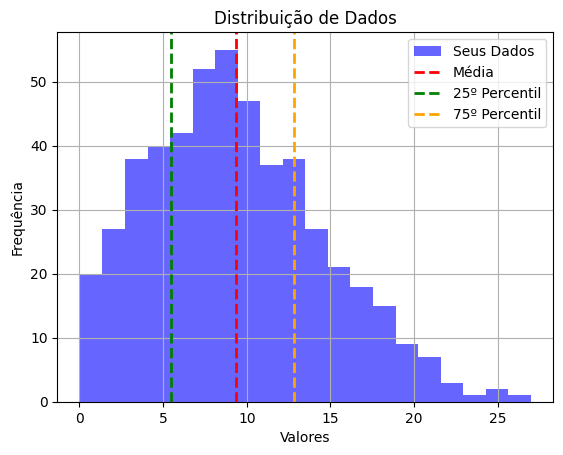

Média: 9.34
Desvio Padrão: 5.17
25º Percentil: 5.46
75º Percentil: 12.81


In [ ]:

# Lendo os dados do arquivo "LAT.txt"
with open("LAT.txt", "r", encoding="utf-8-sig") as datas:  # Usar "utf-8-sig" para remover o BOM
    data_list = [float(line.strip()) for line in datas]

# Criando um gráfico de barras simples
plt.hist(data_list, bins=20, color='blue', alpha=0.6, label='Seus Dados')

# Calculando estatísticas
media = np.mean(data_list)
desvio_padrao = np.std(data_list)
quartil_25 = np.percentile(data_list, 25)
quartil_75 = np.percentile(data_list, 75)

# Adicionando linhas para média e quartis
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(quartil_25, color='green', linestyle='dashed', linewidth=2, label='25º Percentil')
plt.axvline(quartil_75, color='orange', linestyle='dashed', linewidth=2, label='75º Percentil')

# Configurando o gráfico
plt.title('Distribuição de Dados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Imprimindo estatísticas
print(f'Média: {media:.2f}')
print(f'Desvio Padrão: {desvio_padrao:.2f}')
print(f'25º Percentil: {quartil_25:.2f}')
print(f'75º Percentil: {quartil_75:.2f}')


In [ ]:
from scipy.stats import norm

# Lendo os dados do arquivo "LAT.txt"
with open("LAT.txt", "r", encoding="utf-8-sig") as datas:  # Usar "utf-8-sig" para remover o BOM
    data_list = [float(line.strip()) for line in datas]

# Definindo a função para realizar o teste Z para uma amostra
def one_sample_z_test(data, hypothesized_mean, alpha):
    # Calculando a média da amostra
    sample_mean = np.mean(data)
    # Calculando o desvio padrão da amostra
    sample_std = np.std(data, ddof=1)
    # Obtendo o tamanho da amostra
    n = len(data)

    # Calculando a estatística Z
    z_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))

    # Calculando o valor crítico para o nível de confiança especificado
    critical_value = norm.ppf(alpha)

    # Verificando se a estatística Z é menor do que o valor crítico
    if z_statistic < critical_value:
        print(f"Rejeite a hipótese nula. Estatística-Z {z_statistic:.2f} é menor que o valor crítico {critical_value:.2f}.")
    else:
        print(f"Não rejeite a hipótese nula. Estatística-Z {z_statistic:.2f} não é menor que o valor crítico {critical_value:.2f}.")

# Nível de confiança de 95% (alpha = 0.05)
alpha = 0.01


# Realizando o teste Z para a lista de dados com uma média hipotética de 18
one_sample_z_test(data_list, 18, alpha)


Rejeite a hipótese nula. Estatística-Z -37.37 é menor que o valor crítico -2.33.


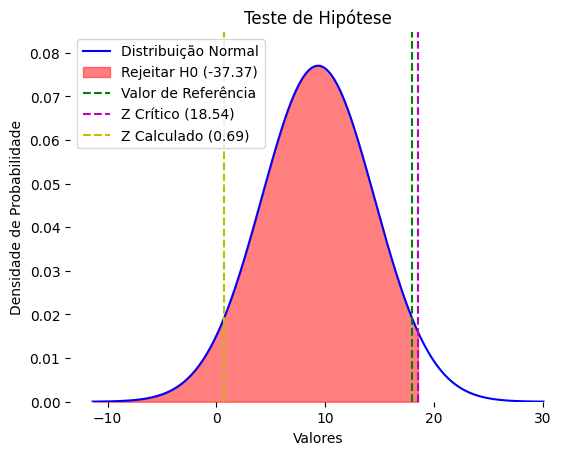

In [ ]:

# Valor de referência (hipótese nula)
valor_referencia = 18


# Nível de significância de 0.05
nivel_significancia = 0.01
desvio_padrao_amostra = 5.179455
tamanho_amostra = 500  # Tamanho da amostra
media_amostra = 9.342814

# Seus dados
with open("LAT.txt", "r", encoding="utf-8-sig") as datas:  # Usar "utf-8-sig" para remover o BOM
    data_list = [float(line.strip()) for line in datas]

# Calcula o erro padrão da média
std_erro = desvio_padrao_amostra / np.sqrt(tamanho_amostra)

# Calcula o valor Z calculado
z_calculado = (media_amostra - valor_referencia) / std_erro

# Calculando o valor crítico (z crítico) para o nível de significância
z_critico = stats.norm.ppf(nivel_significancia)

# Criando um array de valores no intervalo desejado para a distribuição normal
x = np.linspace(media_amostra - 4 * desvio_padrao_amostra, media_amostra + 4 * desvio_padrao_amostra, 1000)

# Calcula os valores da densidade de probabilidade da distribuição normal
pdf_values = stats.norm.pdf(x, loc=media_amostra, scale=desvio_padrao_amostra)

# Criando o gráfico da distribuição normal
plt.plot(x, pdf_values, color='blue', label='Distribuição Normal')

# Plota a região de rejeição em vermelho (à esquerda do valor crítico)
plt.fill_between(x, 0, pdf_values, where=x < valor_referencia - z_critico * std_erro, color='red', alpha=0.5, label=f'Rejeitar H0 ({z_calculado:.2f})')

# Marcando o valor de referência
plt.axvline(x=valor_referencia, color='g', linestyle='--', label='Valor de Referência')

# Marcando o valor crítico Z
plt.axvline(x=valor_referencia - z_critico * std_erro, color='m', linestyle='--', label=f'Z Crítico ({valor_referencia - z_critico * std_erro:.2f})')

# Marcando o valor Z calculado
plt.axvline(x=media_amostra + z_calculado * std_erro, color='y', linestyle='--', label=f'Z Calculado ({media_amostra + z_calculado * std_erro:.2f})')

# Configurando o gráfico
plt.title('Teste de Hipótese')
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.box(False)
plt.ylim(0, max(pdf_values) * 1.1)  # Definindo a escala do eixo Y
plt.legend(loc='best')


# Exibindo o gráfico
plt.show()
